# Lung Cancer Survey Data Analysis

**1. Import Libraries**

_Start by importing the necessary libraries for data handling, cleaning, exploration, modeling, and visualization._

In [1]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc


**2. Obtain**

_The dataset used for this analysis was downloaded from Kaggle
link: https://www.kaggle.com/datasets/nancyalaswad90/lung-cancer_

In [2]:
df = pd.read_csv(r'E:\Data science Project\lung cancer survey.csv')


In [3]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [5]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


**3. Scrub**

_Data cleaning was necessary to prepare the data for analysis_

_The dataset had no missing values._

In [6]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

_For EDA, numerical values are transformed to categorical values_

In [7]:
df.replace({1: "No", 2:"Yes"}, inplace=True)

In [8]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    object
 3   YELLOW_FINGERS         309 non-null    object
 4   ANXIETY                309 non-null    object
 5   PEER_PRESSURE          309 non-null    object
 6   CHRONIC DISEASE        309 non-null    object
 7   FATIGUE                309 non-null    object
 8   ALLERGY                309 non-null    object
 9   WHEEZING               309 non-null    object
 10  ALCOHOL CONSUMING      309 non-null    object
 11  COUGHING               309 non-null    object
 12  SHORTNESS OF BREATH    309 non-null    object
 13  SWALLOWING DIFFICULTY  309 non-null    object
 14  CHEST PAIN             309 non-null    object
 15  LUNG_CANCER            

**4. Explore**

_Several exploratory visualizations were used to understand feature distributions and their relationships with lung cancer_

**- Age Destribution** 

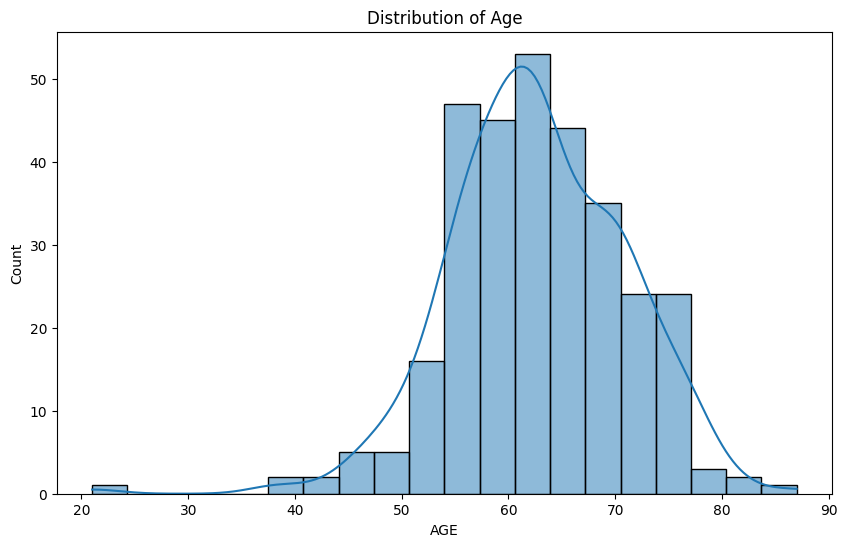

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

**- Lung Cancer Distribution by Gender**

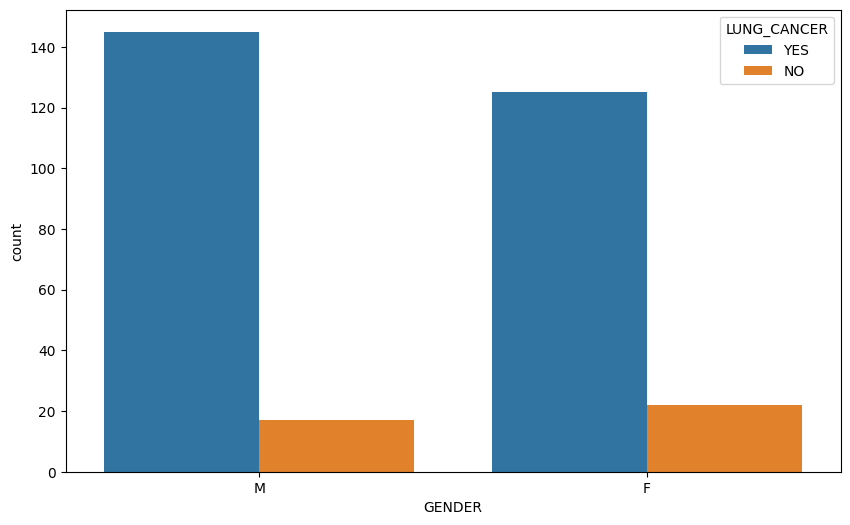

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='GENDER', hue='LUNG_CANCER')
plt.show()

**- Lung Cancer Distribution by Smoking Habits**

<Axes: xlabel='SMOKING', ylabel='count'>

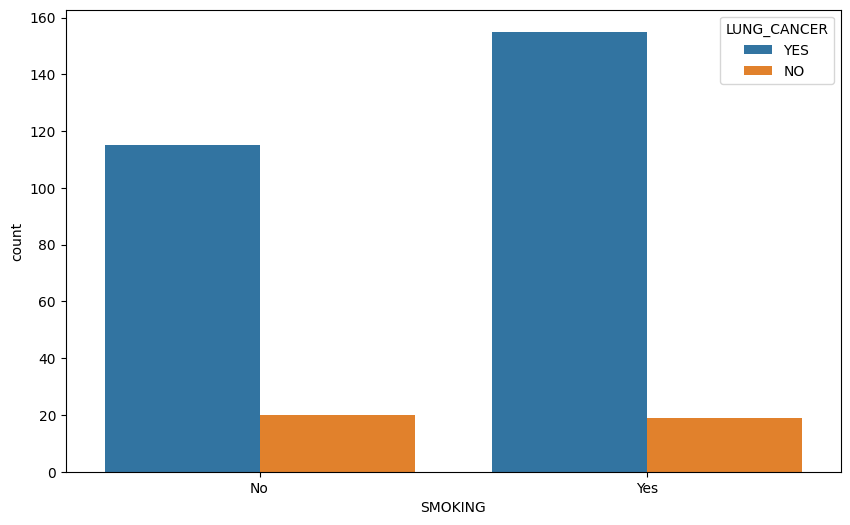

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMOKING' , hue="LUNG_CANCER") 

**- Lung Cancer Distribution by Presence of Chronic Disease**

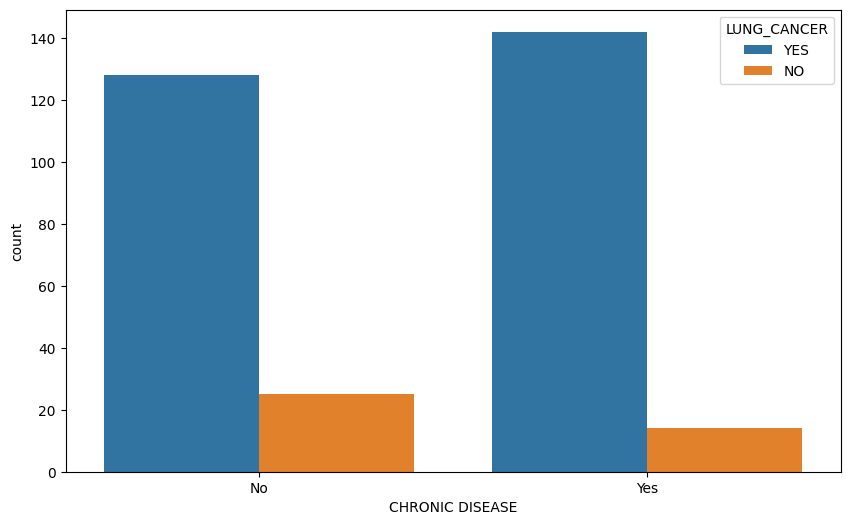

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="CHRONIC DISEASE" , hue="LUNG_CANCER")
plt.show()

In [14]:
X = df.drop('LUNG_CANCER', axis=1)  # Features (all columns except the target)
y = df['LUNG_CANCER']                # Target variable (what you want to predict)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<Axes: xlabel='SHORTNESS OF BREATH', ylabel='count'>

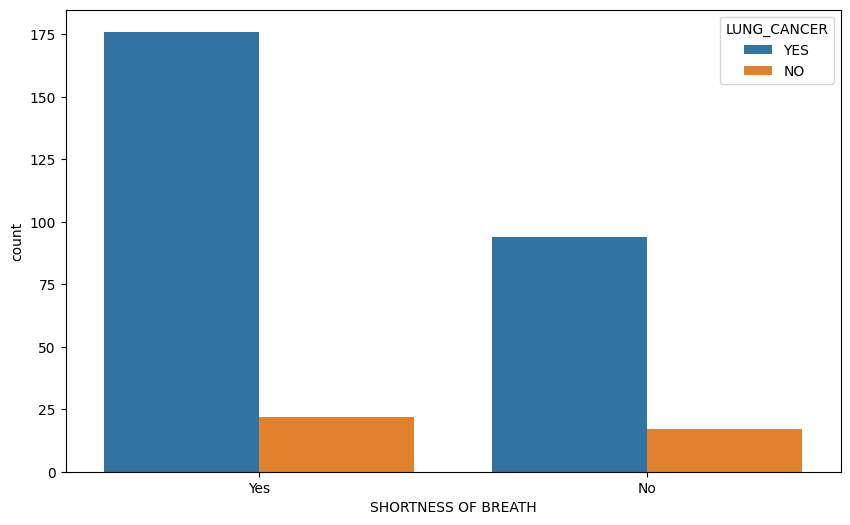

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="SHORTNESS OF BREATH", hue="LUNG_CANCER")

_For Correlation, categorical values are transformed to Numerical values_

In [16]:
df.replace({"No": 1 , "Yes": 2}, inplace=True)

In [17]:
df['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [18]:
df['LUNG_CANCER'].replace({"NO": 1, "YES": 2}, inplace=True)


In [19]:
df.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER               int64
dtype: object

In [20]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


**- Correlation Matrix**

_A heatmap helped us spot relationships between features_

In [21]:
correlation_matrix = df.drop(columns=['GENDER']).corr()

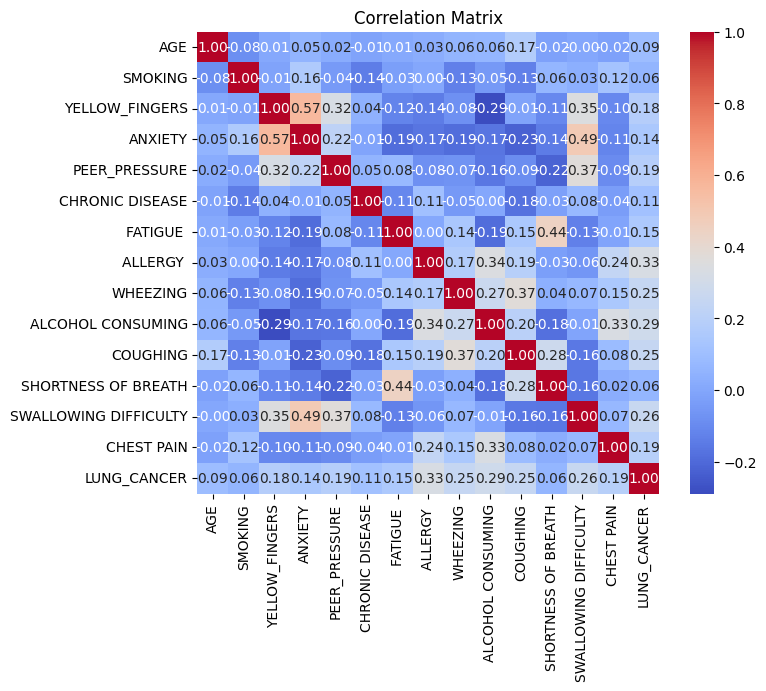

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [23]:
le_gender = LabelEncoder()
le_cancer = LabelEncoder()

df['GENDER'] = le_gender.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = le_cancer.fit_transform(df['LUNG_CANCER'])

**5. Model**

_Split and Train_

In [24]:
X = df.drop('LUNG_CANCER', axis=1)

y = df['LUNG_CANCER']  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**- Random Forest**

In [26]:
Rf_model = RandomForestClassifier(n_estimators=500, max_depth=None, random_state=42, class_weight='balanced')
Rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42)

In [27]:
y_pred = Rf_model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Rate: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy Rate: 96.77%
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [29]:
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, Rf_model.predict(X_test)))

Random Forest Confusion Matrix:
[[ 1  1]
 [ 1 59]]


**- Logistic Regression**

In [30]:
LG_model = LogisticRegression(max_iter=500,class_weight='balanced')

In [31]:
LG_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [32]:
y_pred = LG_model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Rate: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))

Accuracy Rate: 88.71%
              precision    recall  f1-score   support

           0       0.14      0.50      0.22         2
           1       0.98      0.90      0.94        60

    accuracy                           0.89        62
   macro avg       0.56      0.70      0.58        62
weighted avg       0.95      0.89      0.92        62



In [34]:
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, LG_model.predict(X_test)))


Logistic Regression Confusion Matrix:
[[ 1  1]
 [ 6 54]]


**_performance of classification model is being evaluated by ROC curve_**

In [35]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

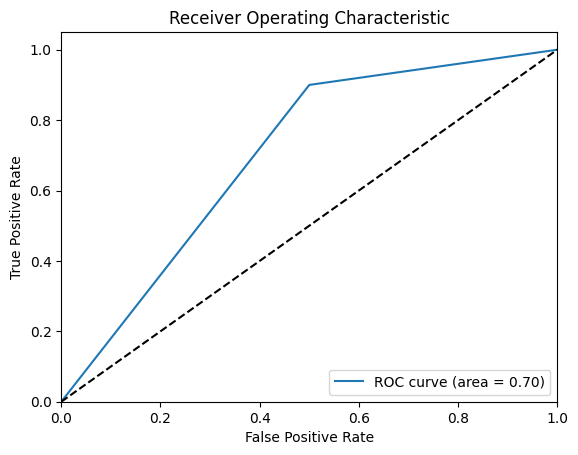

In [36]:
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

**6. iNterpret**

**_Random Forest_** _performed better with an accuracy rate of **96.77%**, excelling at predicting lung cancer outcomes with strong precision and recall._

**_Logistic Regression_** _also performed reasonably well with **88.71%** accuracy but had slightly more misclassifications._

**_ROC Curve Analysis_** _The area under the curve (AUC) score was **0.70**, indicating good model performance._